## <div style="direction:ltr;text-align:left;">In this repo we will review all of thing that i learned about Opencv :D.</div>
<div> We will go from simple concepts to complex concepts and cover every thing that I know.</div>
<div>I hope that this repo can help you learn something new about Opencv.</div> 

## <div style="direction:ltr;text-align:left;">We will start with a simple lesson reading images and showing them.</div>

In [1]:
#import modules
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

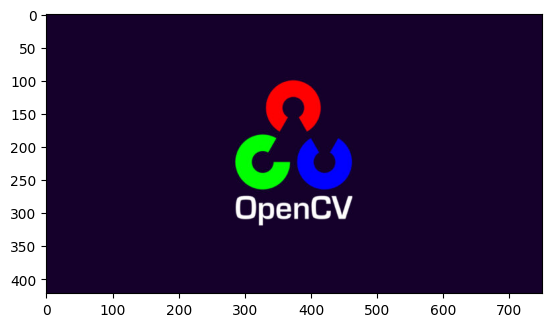

In [5]:
# All of pictures that you will need is in the 'Pictures' file.
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
"""
When we read images using opencv their color channels are 'B-G-R' 
but matplotlib can show images correctly when their color channels are 'R-G-B'.
"""
plt.imshow(img)

## <div style="direction:ltr;text-align:left;">Cropping pictures and figure in matplotlib</div>

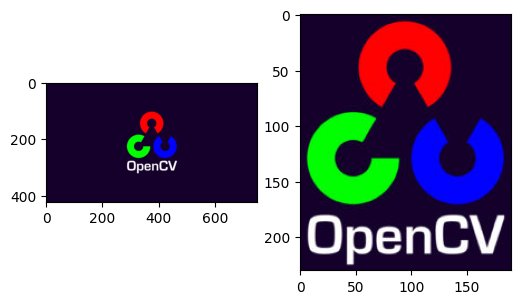

In [40]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
#We can use pixels for croppting every part that we want.
cropped_img = img[95:325,280:470]
#You can use 'figure' to create set of images to show and set the size of the set using 'figsize' parameter.
#figsize = [Width,Height]
plt.figure(figsize=[6,10])
#Use 'subplot' to set the position of image.
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)

plt.imshow(cropped_img)



## <div style="direction:ltr;text-align:left;">Color channels</div>

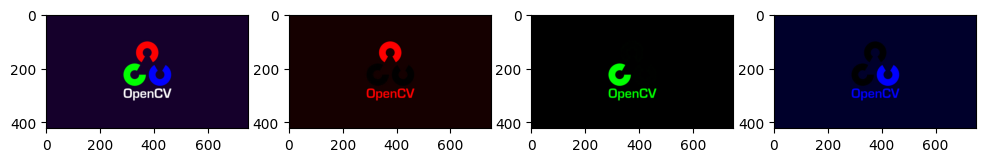

In [15]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
#First get all of color channels for your image using split.
R_channel,G_channel,B_channel = cv.split(img)
#Create a matrix with zero values like one of your color channels.
black_channel = np.zeros_like(R_channel)
#Create a new image and pass the color channel that you want to show.
Red_image = cv.merge([R_channel,black_channel,black_channel])
Green_image = cv.merge([black_channel,G_channel,black_channel])
blue_image = cv.merge([black_channel,black_channel,B_channel])
#After that show the images.
plt.figure(figsize=[12,15])
plt.subplot(141)
plt.imshow(img)
plt.subplot(142)
plt.imshow(Red_image)
plt.subplot(143)
plt.imshow(Green_image)
plt.subplot(144)
plt.imshow(blue_image)



## <div style="direction:ltr;text-align:left;">transparent image</div>

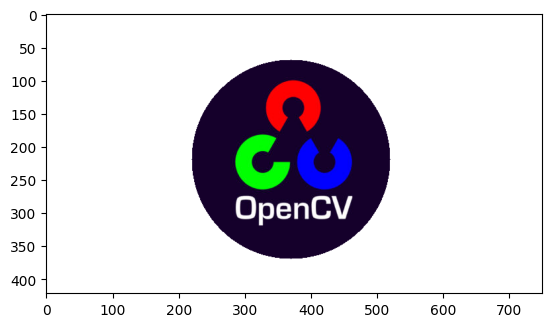

In [15]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#Get hight and width for your image.
hight,width = img.shape[0:2]
#Create a 4 channel iamge.
transparent_img = np.zeros((hight,width,4),np.uint8)
#Set channels 0 to 2 equal to your image.
transparent_img[...,0:3] = img
#Create a mask.
mask = np.zeros((hight,width),np.uint8)
#Set part of image that you want to be shown.
cv.circle(mask, (370, 220),150, (255,255,255), -1)
#Set channel 3 equal to your mask.
transparent_img[...,3] = mask
plt.imshow(transparent_img)
